## Sentiment Analysis for Movie's Reviews
* Project Based on the Kaggle Competition "Bag of Words Meets Bags of Popcorn"

### Ideas:
* #### Predict the sentiment for each review on testData
* #### Assign sentiment to each review on unlabeledTrainData (unsupervised learning).
* #### Explore classification of people based on review and sentiment.

**Data Set **
* The data set consists of 100,000 IMDB movie reviews, specially selected for sentiment analysis. 
* The sentiment of reviews is binary, meaning the IMDB rating < 5 results in a sentiment score of 0, and rating >=7 have a sentiment score of 1. 
* No individual movie has more than 30 reviews.
* The 25,000 review labeled training set does not include any of the same movies as the 25,000 review test set. 
* In addition, there are another 50,000 IMDB reviews provided without any rating labels.

** File descriptions **
* **labeledTrainData** The file is tab-delimited and has a header row followed by 25,000 rows containing an id, sentiment, and text for each review.  
* **testData** The tab-delimited file has a header row followed by 25,000 rows containing an id and text for each review.
* **unlabeledTrainData** The tab-delimited file has a header row followed by 50,000 rows containing an id and text for each review. 

** Data fields **
* **id** - Unique ID of each review
* **sentiment** - Sentiment of the review; 1 for positive reviews and 0 for negative reviews
* **review** - Text of the review


### Homework #2 Feedback
* You've obviously had lots of fun with natural language processing part of this course!
* I think I would have wanted to see some attempt at regression. For example, are longer reviews more positive? What about longer sentences?
* I'm guessing that if you grouped movies by their genre that you might see some interesting patterns. e.g. "thinking" movie reviews might correlate well with the sophistication of the language used in the review.

In [3]:
# Importing all the libraries and tools to be used

%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot') # This styles the graphs in a nicer format

import nltk
import sklearn.linear_model
import textblob

# Other style of graphs
from bokeh.plotting import figure,show,output_notebook
from bokeh.models import Range1d
output_notebook()

#Models
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.dummy import DummyClassifier

from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.cross_validation import train_test_split,cross_val_score

from sklearn.metrics import accuracy_score,metrics,classification_report,confusion_matrix,roc_curve,auc

from sklearn.pipeline import Pipeline
from sklearn.grid_search import GridSearchCV

import sklearn.cluster
from wordcloud import WordCloud, STOPWORDS
from scipy.misc import imread

from sklearn.preprocessing import StandardScaler

Loading BokehJS ...

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/sklearn/metrics/metrics.py:4: DeprecationWarning: sklearn.metrics.metrics is deprecated and will be removed in 0.18. Please import from sklearn.metrics
  DeprecationWarning)


In [4]:
# Loading Data Sets using Pandas
train_data = pd.read_csv('labeledTrainData.tsv', header=0, delimiter="\t", quoting=3)
test_data = pd.read_csv('testData.tsv', header=0, delimiter="\t", quoting=3)
unlabeled_train_data = pd.read_csv('unlabeledTrainData.tsv', header=0, delimiter="\t", quoting=3)

In [5]:
# Visually inspecting the Data Sets

train_data.head()
print train_data.sentiment.value_counts()

test_data.head()

unlabeled_train_data.head()

1    12500
0    12500
Name: sentiment, dtype: int64


id                                             review
0   "9999_0"  "Watching Time Chasers, it obvious that it was...
1  "45057_0"  "I saw this film about 20 years ago and rememb...
2  "15561_0"  "Minor Spoilers<br /><br />In New York, Joan B...
3   "7161_0"  "I went to see this film with a great deal of ...
4  "43971_0"  "Yes, I agree with everyone on this site this ...

In [6]:
# Visualising to see distribution of sentiment on training data

#train_data.sentiment.value_counts().plot(kind='bar', title='Number of Reviews')
#plt.xlabel('Sentiment')
#plt.ylabel('Count')


# create a new plot with a title and axis labels
p = figure(title="Number of Reviews per Sentiment", x_axis_label='Review Sentiment', y_axis_label='Number of Reviews')

hist, edges = np.histogram(train_data.sentiment.values, density=False, bins=2)
p.quad(top=hist, 
       bottom=0, 
       left=([ -0.25 ,  0.75]),
       right=([ 0.25,  1.25 ]),
       line_color='black',
       color=['red','green'],
      )
p.x_range = Range1d(-0.5, 1.5)

# show the results
show(p)

In [7]:
# Performing a Scatter Matrix on the Train Data

#pd.scatter_matrix(train_data, figsize=(15,15))

In [8]:
# Further checking each Data Set
test_data.index
test_data.dtypes 
test_data.shape
print test_data.info()

train_data.index
train_data.dtypes 
train_data.shape
print train_data.info()

unlabeled_train_data.index
unlabeled_train_data.dtypes 
unlabeled_train_data.shape
print unlabeled_train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
id        25000 non-null object
review    25000 non-null object
dtypes: object(2)
memory usage: 390.7+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
id           25000 non-null object
sentiment    25000 non-null int64
review       25000 non-null object
dtypes: int64(1), object(2)
memory usage: 586.0+ KB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
id        50000 non-null object
review    50000 non-null object
dtypes: object(2)
memory usage: 781.3+ KB
None


In [9]:
# Cheking one review of the train data

#train_data["review"][18765]

In [10]:
# Checking one review of the test data

#test_data["review"][345]

In [11]:
# Checking one review of the unlabeled train data

#unlabeled_train_data["review"][12500]

In [12]:
# Further checking each Data Set with describe
print train_data.describe(include='all')
print test_data.describe(include='all')
print unlabeled_train_data.describe(include='all')

# Non uniques reviews numbers on Test Data
print 25000-len(set(train_data['review']))
print 25000-len(set(test_data['review']))
print 50000-len(set(unlabeled_train_data['review']))

#       for line in infile:
#            if line not in seen:
#                outfile.write(line)
#                seen.add(line)

              id    sentiment  \
count      25000  25000.00000   
unique     25000          NaN   
top     "4189_1"          NaN   
freq           1          NaN   
mean         NaN      0.50000   
std          NaN      0.50001   
min          NaN      0.00000   
25%          NaN      0.00000   
50%          NaN      0.50000   
75%          NaN      1.00000   
max          NaN      1.00000   

                                                   review  
count                                               25000  
unique                                              24904  
top     "When i got this movie free from my job, along...  
freq                                                    3  
mean                                                  NaN  
std                                                   NaN  
min                                                   NaN  
25%                                                   NaN  
50%                                                   NaN  
75%

In [13]:
#Checking data set to see if there is any empty value
train_data.head()
train_data[train_data.id.isnull() == True]
train_data[train_data.sentiment.isnull() == True]
train_data[train_data.review.isnull() == True]

test_data.head()
test_data[train_data.id.isnull() == True]
test_data[train_data.review.isnull() == True]

unlabeled_train_data.head()
unlabeled_train_data[unlabeled_train_data.id.isnull() == True]
unlabeled_train_data[unlabeled_train_data.review.isnull() == True]

Empty DataFrame
Columns: [id, review]
Index: []

In [14]:
# Gathering positive review in separate Data Set
# Also getting a positive review sample

# I am not too sure about this idea 26-07-2016
positive_review_train_data = train_data[train_data.sentiment == 1]
positive_review_train_data
pos_review_train_sample = positive_review_train_data.review[2000]
pos_review_train_sample

'"I got a free pass to a preview of this movie last night and didn\'t know what to expect. The premise seemed silly and I assumed it would be a lot of shallow make-fun-of-the-virgin humor. What a great surprise. I laughed so hard I cried at some of the jokes. This film is a must see for anyone with an open mind and a slightly twisted sense of humor. OK.....this is not a movie to go to with your grandmother (Jack Palance?) or small children. The language is filthy, the jokes are (very) crude, and the sex talk is about as graphic as you\'ll find anywhere. What\'s amazing, however, is that the movie is still a sweet love story. My girlfriend and I both loved it. Steve Carell is terrific, but (like The Office) the supporting cast really makes the film work. All of the characters have their flaws, but they also have depth and likability. Everyone pulls their weight and the chemistry is perfect. I can\'t wait to get the DVD. I\'m sure it will be up there with Office Space for replays and quo

### Attempts to perform some Classification

In [15]:
#Further checking each Data Set
train_data.review.describe()
train_data.shape

test_data.review.describe()
test_data.shape

unlabeled_train_data.describe()
unlabeled_train_data.shape

(50000, 2)

In [16]:
# Making all non-capital letters

#train_data['review'] = train_data['review'].str.lower()
#test_data['review'] = test_data['review'].str.lower()
#unlabeled_train_data['review'] = unlabeled_train_data['review'].str.lower()

In [42]:
# Instantiate Vectorizers
# Learn the Review Vocabulary of the Training Data

#Count Vectorizer
count_vect = CountVectorizer(stop_words='english', decode_error = 'ignore')
count_vect_unlabeled = CountVectorizer(stop_words='english', decode_error = 'ignore')
count_vect_kmeans = CountVectorizer(stop_words='english', decode_error = 'ignore')
bag_of_words_train = count_vect.fit_transform(train_data['review'])

#count_vect_test = count_vect.fit_transform(test_data['review'])
bag_of_words_unlabeled = count_vect_unlabeled.fit_transform(unlabeled_train_data['review'])

#TFID Vectorizer
tfidf_vect = TfidfVectorizer(stop_words='english', decode_error = 'ignore')
tfidf_vect_kmeans = TfidfVectorizer(stop_words='english', decode_error = 'ignore')
tfidf_bag_of_words_train = tfidf_vect.fit_transform(train_data['review'])


# Data for KMeans due to high processing time
bag_of_words_train_kmeans = count_vect_kmeans.fit_transform(train_data['review'].head(5000))
y_train_data = train_data['sentiment'].head(5000)

#Implement a MultinomialNB classifier using CountVectorizor with the options: max_features, min_df, and max_df

In [43]:
# Checking the output of Training Bag
print bag_of_words_train.todense().shape

# Checking the output of Training Bag
print tfidf_bag_of_words_train.todense().shape

#print count_vect_test.todense().shape
print bag_of_words_unlabeled.todense().shape

(25000, 74539)
(25000, 74539)
(50000, 102751)


In [45]:
# CV Vocabulary words
vocabulary_words = list(count_vect.get_feature_names())
count_vect.get_params

vocabulary_words_unlabeled = list(count_vect_unlabeled.get_feature_names())
count_vect_unlabeled.get_params

<bound method CountVectorizer.get_params of CountVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), preprocessor=None, stop_words='english',
        strip_accents=None, token_pattern=u'(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)>

In [20]:
# TFIDF Vocabulary words
tfidf_vocabulary_words = list(tfidf_vect.get_feature_names())
tfidf_vect.get_params

<bound method TfidfVectorizer.get_params of TfidfVectorizer(analyzer=u'word', binary=False, decode_error='ignore',
        dtype=<type 'numpy.int64'>, encoding=u'utf-8', input=u'content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm=u'l2', preprocessor=None, smooth_idf=True,
        stop_words='english', strip_accents=None, sublinear_tf=False,
        token_pattern=u'(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)>

In [46]:
# Splitting the Train Data (Labeled)

X_train,X_test,y_train,y_test = train_test_split(bag_of_words_train,
                                                 train_data['sentiment'],
                                                 random_state=42,test_size=0.2
                                                )


tfidfX_train,tfidfX_test,tfidfy_train,tfidfy_test = train_test_split(tfidf_bag_of_words_train,
                                                                     train_data['sentiment'],
                                                                     random_state=42,test_size=0.2
                                                                    )

In [47]:
# Dummy Classifier and Scoring
Dummy = DummyClassifier(strategy='most_frequent')

Dummy.fit(X_train, y_train)
Dummy_predictions = Dummy.predict(X_test)

print Dummy.score(X_test,y_test)
print accuracy_score(y_test, Dummy_predictions)
#print cross_val_score(Dummy,X_test,y_test,cv=100).mean()
print "%.4f" % cross_val_score(Dummy,X_test,y_test,cv=100).mean()

0.4962
0.4962
0.5038


In [23]:
#Dummy Confusion Matrix 
Dummy_confusion_matrix = confusion_matrix(y_test,Dummy_predictions)

cm_df = pd.DataFrame(Dummy_confusion_matrix,
                     columns=['Predicted Class 0', 'Predicted Class 1'], 
                     index=['Actual Class 0', 'Actual Class 1']
                    )

print "Results of Linear Regression: "
print cm_df,'\n'
#print "Precision:",float(Dummy_confusion_matrix[1,1])/(Dummy_confusion_matrix[0,1]+Dummy_confusion_matrix[1,1])
#print "Recall:",float(Dummy_confusion_matrix[1,1])/(Dummy_confusion_matrix[1,0]+Dummy_confusion_matrix[1,1]),'\n'
print "============================================"

Results of Linear Regression: 
                Predicted Class 0  Predicted Class 1
Actual Class 0               2481                  0
Actual Class 1               2519                  0 



In [24]:
#Naive Bayes Classification
NB_classifier = MultinomialNB().fit(X_train, y_train)

#tfidfNB_classifier = MultinomialNB().fit(tfidfX_train, tfidfy_train)

In [25]:
#See the NB Scoring
NB_predictions = NB_classifier.predict(X_test)

print NB_classifier.score(X_test,y_test)
#print tfidfNB_classifier.score(tfidX_test,tfidy_test)
print accuracy_score(y_test, NB_predictions)

#print cross_val_score(NB_classifier,X_test,y_test,cv=100).mean()
print "%.4f" % cross_val_score(NB_classifier,X_test,y_test,cv=100).mean()

0.8584
0.8584
0.8444


In [26]:
# Feature Selection analysis of NB
type(NB_classifier.coef_)

#Feature_Importance_NB = pd.DataFrame({'feature':vocabulary_words, 'importance':NB_classifier.coef_.ravel()})
#Feature_Importance[Feature_Importance.importance != 0].sort('importance', ascending=False).head(20)

#LR.coef_.ravel().shape
#Feature_Importance_LR = pd.DataFrame({'feature':vocabulary_words, 'importance':LR.coef_.ravel()})

numpy.ndarray

In [27]:
# NB Confusion Matrix and Classification Report
NB_confusion_matrix = confusion_matrix(y_test,NB_predictions)

#lets make that easier to read
cm_df = pd.DataFrame(NB_confusion_matrix,
                     columns=['Predicted Class 0', 'Predicted Class 1'], 
                     index=['Actual Class 0', 'Actual Class 1']
                    )

print "Results of Multinomial Naive Bayes: "
print cm_df,'\n'
print "Precision:",float(NB_confusion_matrix[1,1])/(NB_confusion_matrix[0,1]+NB_confusion_matrix[1,1])
print "Recall:",float(NB_confusion_matrix[1,1])/(NB_confusion_matrix[1,0]+NB_confusion_matrix[1,1]),'\n'
print "============================================"

print classification_report(y_test,NB_predictions,target_names=['Class 0','Class 1'])

Results of Multinomial Naive Bayes: 
                Predicted Class 0  Predicted Class 1
Actual Class 0               2175                306
Actual Class 1                402               2117 

Precision: 0.873710276517
Recall: 0.840412862247 

             precision    recall  f1-score   support

    Class 0       0.84      0.88      0.86      2481
    Class 1       0.87      0.84      0.86      2519

avg / total       0.86      0.86      0.86      5000



### GridSearch with Pipelines

In [62]:
X_train_r,X_test_r,y_train_r,y_test_r = train_test_split(train_data['review'],train_data['sentiment'], random_state=42,test_size=0.2)

In [70]:
#text_clf = Pipeline([('vect', CountVectorizer()),
#                     ('clf', MultinomialNB()) ])
#fit_pipe = text_clf.fit(X_train_r,y_train_r)

text_clf = Pipeline([('vect', CountVectorizer(CountVectorizer(stop_words='english', decode_error = 'ignore'))),
                     ('clf', (LogisticRegression(C=0.1))) ])
fit_pipe = text_clf.fit(X_train_r,y_train_r)

#max_df=1000,min_df=1)

In [71]:
PI_predictions = fit_pipe.predict(X_test_r)

In [72]:
print fit_pipe.score(X_test_r,y_test_r)

print accuracy_score(y_test_r, PI_predictions)

#print cross_val_score(NB_classifier,X_test,y_test,cv=100).mean()
print "%.4f" % cross_val_score(text_clf,X_test_r,y_test_r,cv=100).mean()

0.8912
0.8912
0.8588


In [73]:
# Pipeline Confusion Matrix and Classification Report
PI_confusion_matrix = confusion_matrix(y_test,PI_predictions)

#lets make that easier to read
cm_df = pd.DataFrame(PI_confusion_matrix,
                     columns=['Predicted Class 0', 'Predicted Class 1'], 
                     index=['Actual Class 0', 'Actual Class 1']
                    )

print "Results of Pipeline: "
print cm_df,'\n'
print "Precision:",float(PI_confusion_matrix[1,1])/(PI_confusion_matrix[0,1]+PI_confusion_matrix[1,1])
print "Recall:",float(PI_confusion_matrix[1,1])/(PI_confusion_matrix[1,0]+PI_confusion_matrix[1,1]),'\n'
print "============================================"

print classification_report(y_test,PI_predictions,target_names=['Class 0','Class 1'])


Results of Pipeline: 
                Predicted Class 0  Predicted Class 1
Actual Class 0               2190                291
Actual Class 1                253               2266 

Precision: 0.886194759484
Recall: 0.899563318777 

             precision    recall  f1-score   support

    Class 0       0.90      0.88      0.89      2481
    Class 1       0.89      0.90      0.89      2519

avg / total       0.89      0.89      0.89      5000



In [84]:
PI_target_predicted_proba = text_clf.predict_proba(X_test_r)


#plot_roc_curve(y_test_r, PI_target_predicted_proba)

In [85]:
y_test_r.value_counts()

1    2519
0    2481
Name: sentiment, dtype: int64

In [86]:
PI_unlabeled_predictions = fit_pipe.predict(unlabeled_train_data['review'])

In [123]:
#Samuel_test = 'Man of Honor is one of those classics that cannot be missed. It is an extraordinary movie with an excellent cast'

In [124]:
#len(fit_pipe.predict(Samuel_test))

In [126]:
unlabeled_train_data['sentiment'] = PI_unlabeled_predictions
#unlabeled_train_data.loc[8].review
#unlabeled_train_data.head(10)
unlabeled_train_data.sentiment.value_counts()

0    25104
1    24896
Name: sentiment, dtype: int64

In [94]:
p10 = figure(title="Number of Reviews per Sentiment", x_axis_label='Review Sentiment', y_axis_label='Number of Reviews')

hist, edges = np.histogram(unlabeled_train_data.sentiment.values, density=False, bins=2)
p10.quad(top=hist, 
       bottom=0, 
       left=([ -0.25 ,  0.75]),
       right=([ 0.25,  1.25 ]),
       line_color='black',
       color=['red','green'],
      )
p10.x_range = Range1d(-0.5, 1.5)

# show the results
show(p10)

In [191]:
parameters = {'vect__min_df':[1,2,3],
              'vect__max_df':[50,100,1000,10000],
             'clf__alpha':[.01,1,100]}

gs_clf = GridSearchCV(text_clf, parameters, n_jobs=1)

In [192]:
# This last long time processing!
fit_grid = gs_clf.fit(X_train_r,y_train_r)

In [194]:
fit_grid.score(X_test_r,y_test_r)

0.84840000000000004

In [257]:
fit_grid.best_params_

{'clf__alpha': 1, 'vect__max_df': 1000, 'vect__min_df': 1}

### Other Classifiers

In [28]:
#Decision Tree and Scoring

DT_classifier = DecisionTreeClassifier()
DT_classifier.fit(X_train, y_train)
DT_predictions = DT_classifier.predict(X_test)

print DT_classifier.score(X_test,y_test)
print accuracy_score(y_test, DT_predictions)
print "%.4f" % cross_val_score(NB_classifier,X_test,y_test,cv=100).mean()


#DT_classifier = DecisionTreeClassifier(max_depth=30).fit(X_train, y_train)

#Params = {'max_depth': range(1,50),
#          'criterion'=[gini, entropy]
#         }
#Create a brute force tool with GridSearchCV
#DT_Brute_Force = sklearn.grid_search.GridSearchCV(DT_classifier,
#                                                  Params,
#                                                  cv=10,
#                                                  scoring='accuracy'
#                                                 )
#DT_Brute_Force.fit(X_train, y_train)
#DT_Brute_Force.best_params

0.7068
0.7068
0.8444


In [690]:
# Random Forests
rfclf = RandomForestClassifier(n_estimators=200,max_features='auto', oob_score=True, random_state=1)
rfclf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=200, n_jobs=1,
            oob_score=True, random_state=1, verbose=0, warm_start=False)

In [691]:
#Processing Took Too Long
#Random Forests Scoring

rfclf_predictions = rfclf.predict(X_test)
print accuracy_score(y_test, rfclf_predictions)

print rfclf.oob_score_

print "%.4f" % cross_val_score(rfclf,X_test,y_test,cv=100).mean()

rfclf.feature_importances_

0.857
0.84805
0.8474


array([  4.41703423e-05,   6.04542060e-05,   2.61706948e-06, ...,
         7.80090178e-07,   1.96010661e-06,   2.24233872e-06])

In [755]:
# Random Forests Confusion Matrix and Classification Report
RF_confusion_matrix = confusion_matrix(y_test,rfclf_predictions)

#lets make that easier to read
cm_df = pd.DataFrame(RF_confusion_matrix,
                     columns=['Predicted Class 0', 'Predicted Class 1'], 
                     index=['Actual Class 0', 'Actual Class 1']
                    )

print "Results of Random Forests: "
print cm_df,'\n'
print "Precision:",float(RF_confusion_matrix[1,1])/(RF_confusion_matrix[0,1]+RF_confusion_matrix[1,1])
print "Recall:",float(RF_confusion_matrix[1,1])/(RF_confusion_matrix[1,0]+RF_confusion_matrix[1,1]),'\n'
print "============================================"

print classification_report(y_test,rfclf_predictions,target_names=['Class 0','Class 1'])

Results of Random Forests: 
                Predicted Class 0  Predicted Class 1
Actual Class 0               2122                359
Actual Class 1                356               2163 

Precision: 0.857652656622
Recall: 0.858674077015 

             precision    recall  f1-score   support

    Class 0       0.86      0.86      0.86      2481
    Class 1       0.86      0.86      0.86      2519

avg / total       0.86      0.86      0.86      5000



In [729]:
#Feature Importances
Feature_Importance = pd.DataFrame({'feature':vocabulary_words, 'importance':rfclf.feature_importances_})
Feature_Importance[Feature_Importance.importance != 0].sort('importance', ascending=False).head(20)

#Feature_Importance[Feature_Importance.importance != 0].sort('importance', ascending=False).tail(50)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


feature  importance
5469         bad    0.012773
73397      worst    0.010139
28437      great    0.007614
71954      waste    0.007135
5234       awful    0.005946
8462      boring    0.004256
22825  excellent    0.004235
65919   terrible    0.003760
6998        best    0.003756
73380      worse    0.003662
39419       love    0.003138
50619       poor    0.003024
43990      movie    0.002974
63604     stupid    0.002809
35649       just    0.002763
50229       plot    0.002748
43420      money    0.002746
73193  wonderful    0.002723
31545   horrible    0.002479
42820    minutes    0.002344

In [694]:
#KNN
KNN_classifier = KNeighborsClassifier().fit(X_train, y_train)
print KNN_classifier.score(X_test,y_test)


KNN_predictions = KNN_classifier.predict(X_test)
print accuracy_score(y_test, KNN_predictions)
print "%.4f" % cross_val_score(KNN_classifier,X_test,y_test,cv=100).mean()
#KNN_classifier = KNeighborsClassifier(5).fit(X_train, y_train)

0.5796
0.5796
0.5692


### Some Regression

In [75]:
# Logistic Regression
LR = LogisticRegression(C=0.1).fit(X_train,y_train)
LR_predictions = LR.predict(X_test)

#cross_val_score(LR,X_test,y_test,cv=100)
#print cross_val_score(LR,X_test,y_test,cv=100).mean()
print "%.4f" % cross_val_score(LR,X_test,y_test,cv=100).mean()
print accuracy_score(y_test, LR_predictions)

0.8667
0.8844


In [61]:
#LR.predict(bag_of_words_unlabeled)

ValueError: X has 102751 features per sample; expecting 74539

In [49]:
y_test.value_counts()
#LR_test_predictions = LR.predict(count_vect_test)

1    2519
0    2481
Name: sentiment, dtype: int64

In [77]:
# LR Confusion Matrix and Classification Report
LR_confusion_matrix = confusion_matrix(y_test,LR_predictions)

#lets make that easier to read
cm_df = pd.DataFrame(LR_confusion_matrix,
                     columns=['Predicted Class 0', 'Predicted Class 1'], 
                     index=['Actual Class 0', 'Actual Class 1']
                    )

print "Results of Logistic Regression: "
print cm_df,'\n'
print "Precision:",float(LR_confusion_matrix[1,1])/(LR_confusion_matrix[0,1]+LR_confusion_matrix[1,1])
print "Recall:",float(LR_confusion_matrix[1,1])/(LR_confusion_matrix[1,0]+LR_confusion_matrix[1,1]),'\n'
print "============================================"

print classification_report(y_test,LR_predictions,target_names=['Class 0','Class 1'])

Results of Logistic Regression: 
                Predicted Class 0  Predicted Class 1
Actual Class 0               2165                316
Actual Class 1                262               2257 

Precision: 0.877186164011
Recall: 0.89599047241 

             precision    recall  f1-score   support

    Class 0       0.89      0.87      0.88      2481
    Class 1       0.88      0.90      0.89      2519

avg / total       0.88      0.88      0.88      5000



In [78]:
def plot_roc_curve(target_test, target_predicted_proba):
    fpr, tpr, thresholds = roc_curve(target_test, target_predicted_proba[:, 1])
    
    roc_auc = auc(fpr, tpr)
    
    p = figure(title='Receiver Operating Characteristic')
    # Plot ROC curve
    p.line(x=fpr,y=tpr,legend='ROC curve (area = %0.3f)' % roc_auc)
    p.x_range=Range1d(0,1)
    p.y_range=Range1d(0,1)
    p.xaxis.axis_label='False Positive Rate or (1 - Specifity)'
    p.yaxis.axis_label='True Positive Rate or (Sensitivity)'
    p.legend.orientation = "bottom_right"
    show(p)
%matplotlib inline

In [79]:
LR_target_predicted_proba = LR.predict_proba(X_test)
#RF_target_predicted_proba = rfclf.predict_proba(X_test)
#NB_target_predicted_proba = NB_classifier.predict_proba(X_test)

plot_roc_curve(y_test, LR_target_predicted_proba)
#plot_roc_curve(y_test, RF_target_predicted_proba)
#plot_roc_curve(y_test, NB_target_predicted_proba)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)


In [53]:
# Coefficients and Fetures
LR.coef_.ravel().shape
Feature_Importance_LR = pd.DataFrame({'feature':vocabulary_words, 'importance':LR.coef_.ravel()})

In [54]:
#Positive Features
Feature_Importance_LR = pd.DataFrame({'feature':vocabulary_words, 'importance':LR.coef_.ravel()})
Top10_Positive = Feature_Importance_LR[Feature_Importance_LR.importance != 0].sort('importance', ascending=False).head(10)
Top10_Positive

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:3: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  app.launch_new_instance()


feature  importance
22825     excellent    0.835989
49024       perfect    0.742493
73193     wonderful    0.709979
26276      funniest    0.700393
54176    refreshing    0.698588
23913      favorite    0.693884
64416  surprisingly    0.690852
2937        amazing    0.683472
64169        superb    0.682266
39427         loved    0.679284

In [806]:
#Plotting Possitive Features
p2 = figure(title="Top 10 Positive Coefficients", x_axis_label='Feature Index', y_axis_label='Coefficient Value')

coefficients=Top10_Positive.importance
x = Top10_Positive.index
i = 0
for val in x:
    p2.quad(top = Top10_Positive.importance.loc[val],
            bottom=0, 
            left=val+800,
            right=val+1200,
            color=['red','orange','green','purple','grey','cyan','magenta','black','blue','brown'][i],
            legend=Top10_Positive.feature.loc[val]
            )
    i = i + 1
p2.y_range = Range1d(min(coefficients)-0.5, max(coefficients)+0.75)
show(p2)

In [807]:
#Negative Features
Top10_Negative = Feature_Importance_LR[Feature_Importance_LR.importance != 0].sort('importance', ascending=True).head(10)
Top10_Negative

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)
  from ipykernel import kernelapp as app


feature  importance
73397           worst   -1.377554
71954           waste   -1.361911
18576  disappointment   -1.037613
5234            awful   -1.005329
18574   disappointing   -0.958968
50622          poorly   -0.958675
8462           boring   -0.947124
73380           worse   -0.828844
37296           lacks   -0.803743
5176            avoid   -0.775535

In [810]:
#Plotting Negative Features
p3 = figure(title="Top 10 Negative Coefficients", x_axis_label='Feature Index', y_axis_label='Coefficient Value')

coefficients=Top10_Negative.importance
x = Top10_Negative.index
i = 0
for val in x:
    p3.quad(top = Top10_Negative.importance.loc[val],
            bottom=0, 
            left=val+800,
            right=val+1200,
            color=['red','orange','green','purple','grey','cyan','magenta','black','blue','brown'][i],
            legend=Top10_Negative.feature.loc[val]
#            legend.orientation = "bottom_right"
            )
    i = i + 1
p3.legend.orientation = "bottom_center"
p3.y_range = Range1d(min(coefficients)-0.5, max(coefficients)+0.75)
show(p3)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/bokeh/core/properties.py:714: BokehDeprecationWarning: bokeh.models.annotations.orientation was deprecated in Bokeh 0.11; please use Legend.location instead
  super(HasProps, self).__setattr__(name, value)


In [812]:
#Absolute Values of Coefficients to compare with Random Forests

Feature_Importance_LR['absolute']=np.absolute(Feature_Importance_LR.importance)
Feature_Importance_LR.sort('absolute', ascending=False).head(20)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:4: FutureWarning: sort(columns=....) is deprecated, use sort_values(by=.....)


feature  importance  absolute
73397           worst   -1.377554  1.377554
71954           waste   -1.361911  1.361911
18576  disappointment   -1.037613  1.037613
5234            awful   -1.005329  1.005329
18574   disappointing   -0.958968  0.958968
50622          poorly   -0.958675  0.958675
8462           boring   -0.947124  0.947124
22825       excellent    0.835989  0.835989
73380           worse   -0.828844  0.828844
37296           lacks   -0.803743  0.803743
5176            avoid   -0.775535  0.775535
57465            save   -0.769782  0.769782
23476           fails   -0.758093  0.758093
20311            dull   -0.751288  0.751288
49024         perfect    0.742493  0.742493
42219            mess   -0.737850  0.737850
73193       wonderful    0.709979  0.709979
50619            poor   -0.703410  0.703410
31545        horrible   -0.701902  0.701902
26276        funniest    0.700393  0.700393

In [639]:
parameters = {'C':[1000, 100, 10, 1, 0.1, 0.01, 0.001, .0001]
             }
GridSearch_LR = GridSearchCV(LR,
                             parameters,
                             cv=100
                            )
#c_list = [1000, 100, 10, 1, 0.1, 0.01, 0.001, .0001]
#cv_scores = []

In [642]:
# Execution Time Long
Fit_GS_LR = GridSearch_LR.fit(X_train,y_train)

In [736]:
Fit_GS_LR.best_params_

{'C': 0.1}

In [737]:
Fit_GS_LR.best_score_

0.88360000000000005

In [774]:
Fit_GS_LR.best_estimator_

LogisticRegression(C=0.1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [782]:
Fit_GS_LR.grid_scores_

[mean: 0.85985, std: 0.02450, params: {'C': 1000},
 mean: 0.86425, std: 0.02459, params: {'C': 100},
 mean: 0.86995, std: 0.02264, params: {'C': 10},
 mean: 0.87580, std: 0.02253, params: {'C': 1},
 mean: 0.88360, std: 0.02209, params: {'C': 0.1},
 mean: 0.87605, std: 0.02049, params: {'C': 0.01},
 mean: 0.84460, std: 0.02212, params: {'C': 0.001},
 mean: 0.78405, std: 0.02739, params: {'C': 0.0001}]

### Futher Exploring / Preparation for Clustering
### Let us work on Test Data (not generated through Cross-Validation)

In [848]:
# Exploring the wrong predcitions
wrong_predictions = []
for predicted,test,i in zip(LR.predict(X_test),y_test.values,y_test.index):
    if predicted==test:
        pass
    else:
        wrong_predictions.append(i)

In [849]:
train_data.loc[wrong_predictions]
wrong_predictions_df = train_data.loc[wrong_predictions]

In [850]:
#wrong_predictions_df
zip(LR.predict(X_test),y_test.values,y_test.index)

[(0, 0, 6868),
 (1, 1, 24016),
 (0, 0, 9668),
 (1, 1, 13640),
 (0, 0, 14018),
 (1, 1, 7488),
 (1, 1, 5804),
 (1, 0, 12909),
 (0, 0, 3386),
 (1, 0, 9567),
 (0, 0, 21423),
 (0, 0, 3503),
 (0, 0, 6657),
 (1, 1, 19192),
 (1, 1, 2518),
 (1, 1, 13361),
 (0, 0, 21135),
 (1, 1, 21080),
 (1, 0, 6492),
 (0, 0, 6891),
 (1, 1, 7752),
 (0, 0, 8614),
 (0, 1, 6649),
 (1, 1, 2227),
 (1, 1, 12060),
 (0, 0, 19122),
 (1, 1, 9622),
 (1, 1, 12279),
 (1, 0, 16447),
 (1, 1, 423),
 (0, 0, 14337),
 (0, 0, 22163),
 (1, 1, 19839),
 (0, 0, 12456),
 (1, 1, 10277),
 (0, 0, 23085),
 (1, 1, 1805),
 (0, 1, 2790),
 (1, 1, 24427),
 (1, 1, 17716),
 (1, 0, 4972),
 (1, 1, 7613),
 (1, 1, 17238),
 (0, 0, 13570),
 (0, 0, 7946),
 (0, 0, 5100),
 (1, 1, 23948),
 (0, 0, 21182),
 (0, 0, 733),
 (0, 0, 18404),
 (0, 0, 3848),
 (0, 1, 22714),
 (0, 0, 9888),
 (0, 0, 4405),
 (1, 0, 22683),
 (0, 0, 3352),
 (1, 1, 15191),
 (0, 0, 15694),
 (0, 0, 19946),
 (1, 0, 14354),
 (1, 1, 21742),
 (1, 1, 18353),
 (1, 1, 17580),
 (0, 0, 22488),
 (1, 1

In [851]:
wrong_predictions_df.loc[9807]['review']

'"Start of with the good bit: several times Swayze talks Zulu to his friends or that language is heard among the tribes. That\'s a great plus, as normally USA & UK movie audiences think all people on this planet speak English (just in case you\'re one of them: no they don\'t).<br /><br />But the acting is \'tenenkrommend\' as we say in The Netherlands (it makes your toes curl -and not in a good way). I like Swayze but in this he\'s awful. The muscles in his jaws make overtime and he\'s frowning the whole movie -some one must have told him it looks butch. No Patrick: it looks silly and is compensation for lack of character. Alison Doody (Elizabeth) has opted for a style of acting that does not meet the style of her co-workers. Her acting is s\xc3\xb3 relaxed that this movie could have been set in the current days. And it\'s not. Your frock was a clue, Alison.<br /><br />The best acting came from the people from the African Continent and Sided Onyulo as Umbopa I liked best. Clear, warm a

### Google Word2Vec

In [571]:
%load_ext autoreload
%autoreload 2

In [572]:
# Installing Word2Vec

#!pip install word2vec

In [573]:
import word2vec

In [574]:
word2vec.word2phrase(train_data['review'], '/Users/samuelbolivar/Downloads/text-phrases.txt', verbose=True)

In [575]:
word2vec.word2vec(train_data['review'], '/Users/samuelbolivar/Downloads/text.bin', size=100, verbose=True)

In [576]:
model = word2vec.load

#### Some further processing to investigate the relation of words with positive or negative reviews

In [577]:
#count_vect.fit(X_train)
count_vect.get_feature_names()
train_features = count_vect.get_feature_names()

train_features_kmeans = count_vect_kmeans.get_feature_names()

In [578]:
# Transforming training and test data into document-term matrix

#train_dtmatrix = count_vect.transform(X_train)
#test_dtmatrix = count_vect.transform(X_test)

#print test_dtmatrix
#print test_dtmatrix

In [579]:
train_words = count_vect.get_feature_names()
len(train_words)
train_words

[u'00',
 u'000',
 u'0000000000001',
 u'00001',
 u'00015',
 u'000s',
 u'001',
 u'003830',
 u'006',
 u'007',
 u'0079',
 u'0080',
 u'0083',
 u'0093638',
 u'00am',
 u'00pm',
 u'00s',
 u'01',
 u'01pm',
 u'02',
 u'020410',
 u'029',
 u'03',
 u'04',
 u'041',
 u'05',
 u'050',
 u'06',
 u'06th',
 u'07',
 u'08',
 u'087',
 u'089',
 u'08th',
 u'09',
 u'0f',
 u'0ne',
 u'0r',
 u'0s',
 u'10',
 u'100',
 u'1000',
 u'1000000',
 u'10000000000000',
 u'1000lb',
 u'1000s',
 u'1001',
 u'100b',
 u'100k',
 u'100m',
 u'100min',
 u'100mph',
 u'100s',
 u'100th',
 u'100x',
 u'100yards',
 u'101',
 u'101st',
 u'102',
 u'102nd',
 u'103',
 u'104',
 u'1040',
 u'1040a',
 u'1040s',
 u'105',
 u'1050',
 u'105lbs',
 u'106',
 u'106min',
 u'107',
 u'108',
 u'109',
 u'10am',
 u'10lines',
 u'10mil',
 u'10min',
 u'10minutes',
 u'10p',
 u'10pm',
 u'10s',
 u'10star',
 u'10th',
 u'10x',
 u'10yr',
 u'11',
 u'110',
 u'1100',
 u'11001001',
 u'1100ad',
 u'111',
 u'112',
 u'1138',
 u'114',
 u'1146',
 u'115',
 u'116',
 u'117',
 u'11f',
 u'

In [853]:
train_array = bag_of_words_train.toarray()
train_array.shape

# Trying to reduce the Array for KMEANS
#train_array_kmeans = bag_of_words_train_kmeans.toarray()
#train_array_kmeans.shape

(25000, 74539)

In [855]:
print train_array.shape
print np.sum(train_array[:,22825])
# Occurrences of word Excellent

(25000, 74539)
2071


In [856]:
print np.sum(train_array, axis=0)

[ 93 300   1 ...,   1   4   1]


In [1007]:
train_token_counts = pd.DataFrame({'token':train_features, 'count':np.sum(train_array, axis=0)})
train_token_counts.sort_index(by='count', ascending=False).head(20)
#train_token_counts_kmeans = pd.DataFrame({'token':train_features_kmeans, 'count':np.sum(train_array_kmeans, axis=0)})
#train_token_counts_kmeans.sort_index(by='count', ascending=False)

/Users/samuelbolivar/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: by argument to sort_index is deprecated, pls use .sort_values(by=...)
  from ipykernel import kernelapp as app


count       token
8672   101871          br
43990   44047       movie
24445   40159        film
38612   20281        like
35649   17774        just
27960   15147        good
66668   12727        time
63195   11988       story
53637   11738      really
5469     9308         bad
48951    9287      people
28437    9060       great
19496    8848         don
72064    8026         way
40276    8025        make
44007    7668      movies
66278    7297       think
11577    7159  characters
11557    7024   character
71971    6974       watch

### Finally KMeans Clustering on a reduced training set

In [99]:
import sklearn.cluster
kmeans_clusterer = sklearn.cluster.KMeans(init='k-means++', n_clusters=2)
movie_sentiment_cluster_kmeans = kmeans_clusterer.fit_predict(train_array_kmeans)

In [100]:
kmeans_clusterer.cluster_centers_
movie_sentiment_cluster_kmeans

array([1, 0, 0, ..., 0, 0, 0], dtype=int32)

In [125]:
review_colors = np.array(['red','green'])
# green good review
# red bad review

review_colors[movie_sentiment_cluster_kmeans]

array(['green', 'red', 'red', ..., 'red', 'red', 'red'], 
      dtype='|S5')

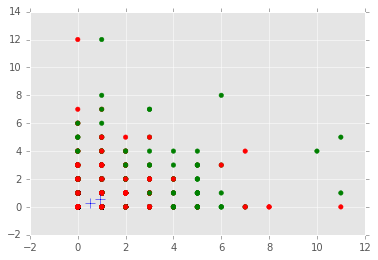

In [126]:
import matplotlib
matplotlib.pyplot.scatter(train_array_kmeans[:,14799],
                          train_array_kmeans[:,2791],
                          color=review_colors[movie_sentiment_cluster_kmeans]
                         )
matplotlib.pyplot.scatter(kmeans_clusterer.cluster_centers_[:,14799],
                          kmeans_clusterer.cluster_centers_[:,2791],
                          marker='+',
                          s=120
                         )
#Cannot make sense of the below

In [124]:
#import sklearn.cluster
#kmeans_clusterer = sklearn.cluster.KMeans(init='k-means++', n_clusters=2)
#movie_sentiment_cluster_kmeans = kmeans_clusterer.fit(train_array)

#kernel dies with the above KMeans Clusterer
#I did not try DBSCAN as the memory consumption would kill my computer

### Homework#1 continued

In [885]:
# Gathering negative review in separate Data Set
# Also getting a negative review sample
negative_review_train_data = train_data[train_data.sentiment == 0]
#negative_review_train_data

positive_review_train_data = train_data[train_data.sentiment == 1]
#negative_review_train_data

In [886]:
# Preparing to do some wordcloud diagrams
#!pip install wordcloud
vect = CountVectorizer(decode_error='ignore')

In [887]:
# learn the vocabulary of ALL messages and save it
vect.fit(train_data.review)
all_features = vect.get_feature_names()

In [888]:
# create document-term matrix of ham, then convert to a regular array
good_dtm = vect.transform(positive_review_train_data.review)
good_arr = good_dtm.toarray()

bad_dtm = vect.transform(negative_review_train_data.review)
bad_arr = bad_dtm.toarray()

In [889]:
# count how many times EACH token appears across ALL messages
good_counts = np.sum(good_arr, axis=0)
good_counts

bad_counts = np.sum(bad_arr, axis=0)
bad_counts

array([ 51, 174,   1, ...,   0,   3,   1])

In [890]:
all_token_counts = pd.DataFrame({'token':all_features, 'good':good_counts, 'bad':bad_counts})
all_token_counts.head()

bad  good          token
0   51    42             00
1  174   126            000
2    1     0  0000000000001
3    2     0          00001
4    1     0          00015

In [891]:
all_token_counts['good'] = all_token_counts.good + 1
all_token_counts['bad'] = all_token_counts.bad + 1

In [1079]:
all_token_counts['bad_ratio'] = all_token_counts.bad / all_token_counts.good
#all_token_counts.sort_index(by='bad_ratio',ascending = False)

all_token_counts['good_ratio'] = all_token_counts.good / all_token_counts.bad
#all_token_counts.sort_index(by='bad_ratio',ascending = False)

In [1002]:
# Good words processing
positive_review_train_data.review.to_csv('good_reviews.csv', index=False)

good_words=' '
count =0
f = open('good_reviews.csv', 'r')
for line in f:
    good_words = good_words + line
f.close

good_words_soup = BeautifulSoup(good_words, 'lxml')

In [1003]:
# Bad words processing
negative_review_train_data.review.to_csv('bad_reviews.csv', index=False)

bad_words=' '
count =0
f = open('bad_reviews.csv', 'r')
for line in f:
    bad_words = bad_words + line
f.close

bad_words_soup = BeautifulSoup(bad_words, 'lxml')

In [1023]:
stopwords = set(STOPWORDS)
stopwords.add('movie')
stopwords.add('film')
stopwords.add('like')
stopwords.add('just')
stopwords.add('time')
stopwords.add('story')
stopwords.add('really')
stopwords.add('people')
stopwords.add('don')
stopwords.add('way')
stopwords.add('one')
stopwords.add('make')
stopwords.add('movies')
stopwords.add('think')
stopwords.add('characters')
stopwords.add('character')
stopwords.add('watch')
stopwords.add('even')
#stopwords.add('good')
#stopwords.add('bad')
#stopwords.add('great')

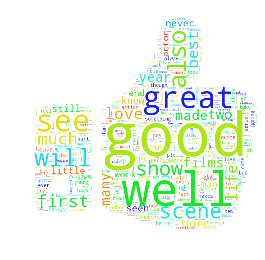

In [1024]:
# Generate a word cloud image for the Positive reviews 

good_mask = imread("thumbs-up-hand-symbol.png")

wordcloud = WordCloud(
#font_path='CabinSketch-Bold.ttf',
stopwords=stopwords,
background_color='white',
max_words=500,
mask=good_mask,
width=7800,
height=4400
).generate(good_words_soup.get_text())
 
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./Good_cloudS4.png', dpi=300)
plt.show()

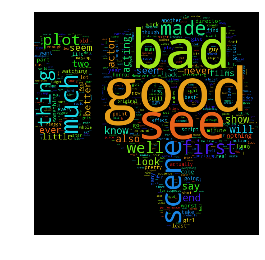

In [1116]:
# Generate a word cloud image for the Negative reviews

good_mask = imread("thumbs-down-hand-symbol.png")

wordcloud = WordCloud(
#font_path='CabinSketch-Bold.ttf',
stopwords=stopwords,
background_color='black',
max_words=500,
mask=good_mask,
width=7800,
height=4400
).generate(bad_words_soup.get_text())
 
plt.imshow(wordcloud)
plt.axis('off')
plt.savefig('./Bad_cloudS4.png', dpi=300)
plt.show()

In [1100]:
# After assigning sentiment to each review on unlabeled train data
# I can merge it with the train data
# and see the difference on predicting the reviews for the test data
# with the model using train data, and combined training data + new labeled data

# I can graph sentiment vs word count on review
# positive and negative

# Infering if reviewer is adult or child depending on lexical variation

type(pos_review_train_sample)
str(bad_words_soup.get_text())

UnicodeEncodeError: 'ascii' codec can't encode character u'\xa8' in position 180: ordinal not in range(128)

In [1101]:
#t = textblob.TextBlob(nltk.sent_tokenize(bad_words_soup.get_text())
bad_distinct_words = set(bad_words_soup.get_text())

print len(bad_distinct_words)
#bad_distinct_words

156


In [1120]:
# Running Tokenize Words for Sample Reviews
print len(nltk.sent_tokenize(bad_words_soup.get_text()))
print "%.4f" % (len(nltk.sent_tokenize(bad_words_soup.get_text())) / 12500.0)

print len(nltk.sent_tokenize(good_words_soup.get_text()))
print "%.4f" % (len(nltk.sent_tokenize(good_words_soup.get_text())) / 12500.0)

#type(nltk.word_tokenize(neg_review_train_sample))
#type(nltk.word_tokenize(pos_review_train_sample))

134715
10.7772
128369
10.2695


In [1102]:
bad_w = nltk.word_tokenize(bad_words_soup.get_text())
good_w = nltk.word_tokenize(good_words_soup.get_text())

In [1103]:
def is_a_real_word(x):
    return x not in ".,[]:!'?&-;()''\\``"

In [1104]:
cleaned_up_bad_w = [
    x.lower() 
        for x in bad_w
        if is_a_real_word(x)
]
cleaned_up_good_w = [
    x.lower() 
        for x in good_w
        if is_a_real_word(x)
]

In [1105]:
distinct_bad_words = set(cleaned_up_bad_w)
distinct_good_words = set(cleaned_up_good_w)

In [1118]:
print len(distinct_bad_words)
print len(cleaned_up_bad_w)
#multiply by 1.0 to make it a float. Good trick!!
lexical_diversity_of_bad_reviews = (len(distinct_bad_words))*1.0 / len(cleaned_up_bad_w)
print "%.4f" % lexical_diversity_of_bad_reviews

92390
2906093
0.0318


In [1117]:
print len(distinct_good_words)
print len(cleaned_up_good_w)
#multiply by 1.0 to make it a float. Good trick!!
lexical_diversity_of_good_reviews = (len(distinct_good_words))*1.0 / len(cleaned_up_good_w)
print "%.4f" % lexical_diversity_of_good_reviews

93147
2972069
0.0313


In [1108]:
#Following example from class hamlet_tex_obj = nltk.Text(nltk.corpus.gutenberg.words("shakespeare-hamlet.txt"))
pos_review_text_obj = nltk.Text(nltk.word_tokenize(good_words_soup.get_text()))

neg_review_text_obj = nltk.Text(nltk.word_tokenize(bad_words_soup.get_text()))

In [1113]:
pos_review_text_obj.concordance('excellent')
#pos_review_text_obj.common_contexts(['excellent'])
#pos_review_text_obj.similar('excellent')
#neg_review_text_obj.dispersion_plot(['excellent',
#                                     'perfect', 
#                                     'wonderful', 
#                                     'funniest',
#                                     'refreshing',
#                                     'favorite',
#                                     'surprisingly',
#                                     'amazing',
#                                     'superb',
#                                     'loved'
#                                    ]
#                                   )

Displaying 25 of 1635 matches:
s.The cinematography speaks of the excellent skills of Josef Werching that acce
ave to say that The Mother does an excellent job of explaining the sexual desir
e . This movie brought to mind the excellent movies that Branagh made with Emma
lm started and ended so well , had excellent acting and writing , it 's hard no
ow , and she and Celeste have been excellent support networks to each other for
 Jim and his bride-to-be all do an excellent job of fitting into stereotypes of
id-fifties.All in all , this is an excellent anime series to watch if you are a
esel . Micheals and Perfect had an excellent match here , but it was Diesel who
 simply because some segments were excellent and covered issues that usually ge
ost movies since . Martin Sheen is excellent , and though Nick Nolte has a smal
has a small part , he too provides excellent support . Vic Morrow as the villai
elf . First of all , the acting is excellent , especially the leads . Although 
o respons

In [1114]:
neg_review_text_obj.concordance('worst')
#neg_review_text_obj.common_contexts(['worst'])
#neg_review_text_obj.similar('worst')
#neg_review_text_obj.dispersion_plot(['worst',
#                                     'waste',
#                                     'disappointment',
#                                     'awful',
#                                     'disappointing',
#                                     'poorly',
#                                     'boring',
#                                     'worse',
#                                     'lacks',
#                                     'avoid'
#                                    ]
#                                   )

Displaying 25 of 2430 matches:
s from his mouth he just vomited the worst film of all time . '' '' '' `` `` ''
 way for a while , with the absolute worst element being Midkiff 's worthless p
 big groan-worthy twist at the end . Worst of all is the overlong `Zion Rave ' 
shreds ! ! ! ! ! \ '' '' That 's the worst part about this movie is , this shar
t BEN AND ARTHUR is quite simply the worst film I have ever sat through in my l
nt of view it is probably one of the worst films I have encountered absolutely 
cast Jeroen Krabbé because he 's the worst actor and every character he 's play
'm faced with here right ? It is the worst film ever because he 's supposed to 
not without competition for title of worst film so it has to sink pretty low to
 . '' '' '' `` `` '' This is n't the worst movie I 've ever seen , but I really
s just as well they have some of the worst - and not just the human characters 
big science fiction.It 's one of the worst movies I have ever seen ... Simply .
'' '' '' 

In [52]:
# Running Tokenize Sentences for Sample Reviews
nltk.sent_tokenize(pos_review_train_sample)[4]
nltk.sent_tokenize(pos_review_train_sample)
nltk.sent_tokenize(neg_review_train_sample)[4]
nltk.sent_tokenize(neg_review_train_sample)
#type(nltk.sent_tokenize(neg_review_train_sample))
#type(nltk.sent_tokenize(pos_review_train_sample))

#Cannot do the following?
#nltk.corpus.gutenberg.sents(positive_review_train_data)
#nltk.corpus.gutenberg.words(neg_review_train_sample)

#List of list for sentences in Sample Reviews
#[nltk.word_tokenize(s) for s in nltk.sent_tokenize(pos_review_train_sample)]
#[nltk.word_tokenize(s) for s in nltk.sent_tokenize(neg_review_train_sample)]

['"I watched this movie really late last night and usually if it\'s late then I\'m pretty forgiving of movies.',
 'Although I tried, I just could not stand this movie at all, it kept getting worse and worse as the movie went on.',
 "Although I know it's suppose to be a comedy but I didn't find it very funny.",
 'It was also an especially unrealistic, and jaded portrayal of rural life.',
 "In case this is what any of you think country life is like, it's definitely not.",
 'I do have to agree that some of the guy cast members were cute, but the french guy was really fake.',
 'I do have to agree that it tried to have a good lesson in the story, but overall my recommendation is that no one over 8 watch it, it\'s just too annoying."']

In [53]:
# Sentiment analysis of Sample Positive Review
pos_review_train_sample_t = textblob.TextBlob(pos_review_train_sample)
pos_review_train_sample_t.sentiment

Sentiment(polarity=0.10977272727272727, subjectivity=0.651010101010101)

In [54]:
# Sentiment analysis of Sample Negative Review
neg_review_train_sample_t = textblob.TextBlob(neg_review_train_sample)
neg_review_train_sample_t.sentiment

Sentiment(polarity=-0.1203125, subjectivity=0.5916666666666667)

In [55]:
neg_review_train_sample_t.words

WordList(['I', 'watched', 'this', 'movie', 'really', 'late', 'last', 'night', 'and', 'usually', 'if', 'it', "'s", 'late', 'then', 'I', "'m", 'pretty', 'forgiving', 'of', 'movies', 'Although', 'I', 'tried', 'I', 'just', 'could', 'not', 'stand', 'this', 'movie', 'at', 'all', 'it', 'kept', 'getting', 'worse', 'and', 'worse', 'as', 'the', 'movie', 'went', 'on', 'Although', 'I', 'know', 'it', "'s", 'suppose', 'to', 'be', 'a', 'comedy', 'but', 'I', 'did', "n't", 'find', 'it', 'very', 'funny', 'It', 'was', 'also', 'an', 'especially', 'unrealistic', 'and', 'jaded', 'portrayal', 'of', 'rural', 'life', 'In', 'case', 'this', 'is', 'what', 'any', 'of', 'you', 'think', 'country', 'life', 'is', 'like', 'it', "'s", 'definitely', 'not', 'I', 'do', 'have', 'to', 'agree', 'that', 'some', 'of', 'the', 'guy', 'cast', 'members', 'were', 'cute', 'but', 'the', 'french', 'guy', 'was', 'really', 'fake', 'I', 'do', 'have', 'to', 'agree', 'that', 'it', 'tried', 'to', 'have', 'a', 'good', 'lesson', 'in', 'the', '

In [56]:
pos_review_train_sample_t.words

WordList(['I', 'got', 'a', 'free', 'pass', 'to', 'a', 'preview', 'of', 'this', 'movie', 'last', 'night', 'and', 'did', "n't", 'know', 'what', 'to', 'expect', 'The', 'premise', 'seemed', 'silly', 'and', 'I', 'assumed', 'it', 'would', 'be', 'a', 'lot', 'of', 'shallow', 'make-fun-of-the-virgin', 'humor', 'What', 'a', 'great', 'surprise', 'I', 'laughed', 'so', 'hard', 'I', 'cried', 'at', 'some', 'of', 'the', 'jokes', 'This', 'film', 'is', 'a', 'must', 'see', 'for', 'anyone', 'with', 'an', 'open', 'mind', 'and', 'a', 'slightly', 'twisted', 'sense', 'of', 'humor', 'OK', 'this', 'is', 'not', 'a', 'movie', 'to', 'go', 'to', 'with', 'your', 'grandmother', 'Jack', 'Palance', 'or', 'small', 'children', 'The', 'language', 'is', 'filthy', 'the', 'jokes', 'are', 'very', 'crude', 'and', 'the', 'sex', 'talk', 'is', 'about', 'as', 'graphic', 'as', 'you', "'ll", 'find', 'anywhere', 'What', "'s", 'amazing', 'however', 'is', 'that', 'the', 'movie', 'is', 'still', 'a', 'sweet', 'love', 'story', 'My', 'girl

In [57]:
# Intention of this code is to do textblob on each of the reviews

#for x in train_data:
#    train_data.review[x]

#positive_review_train_data.sort_values(by='id')
#house_data.sort_values
#positive_review_train_data['review']
#positive_review_train_data.

#train_data.review[0]

In [58]:
# Function to clear strange characters 
def is_a_real_word(x):
    return x not in ".,[]:!'?&-;()"

In [1075]:
# Cleaning Positive Sample Review
cleaned_up_pos_review_train_sample = [
    x.lower() 
        for x in nltk.word_tokenize(pos_review_train_sample)
        if is_a_real_word(x)
]
#cleaned_up_pos_review_train_sample

In [1076]:
# Cleaning Negative Sample Review
cleaned_up_neg_review_train_sample = [
    x.lower() 
        for x in nltk.word_tokenize(neg_review_train_sample)
        if is_a_real_word(x)
]
#cleaned_up_neg_review_train_sample